In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt



In [10]:
# Define column names based on the dataset description (including mean, SE, and worst for each feature)
feature_names = ['radius', 'texture', 'perimeter', 'area','smoothness', 'compactness', 'concavity','concave_points', 'symmetry', 'fractal_dimension']

In [11]:
# Creating column names for mean, se, and worst measurements
column_names = ['id', 'diagnosis'] + [f"{f}_{m}" for f in
feature_names for m in ['mean', 'se', 'worst']]

In [12]:
# Load the dataset
data = pd.read_csv('wdbc.data', header=None, names=column_names)
# Convert the diagnosis column to binary labels (Malignant: 1, Benign: 0)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [13]:

# Drop the 'id' column as it is not required for the analysis
data.drop('id', axis=1, inplace=True)
# Split the data into features and target variable
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)
# Create and train the RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)
# Predictions
predictions = classifier.predict(X_test)
probabilities = classifier.predict_proba(X_test)[:, 1]

Accuracy: 0.9649122807017544
Precision: 0.975609756097561
Recall:0.9302325581395349
F1 Score: 0.9523809523809523
AUC: 0.9952505732066819


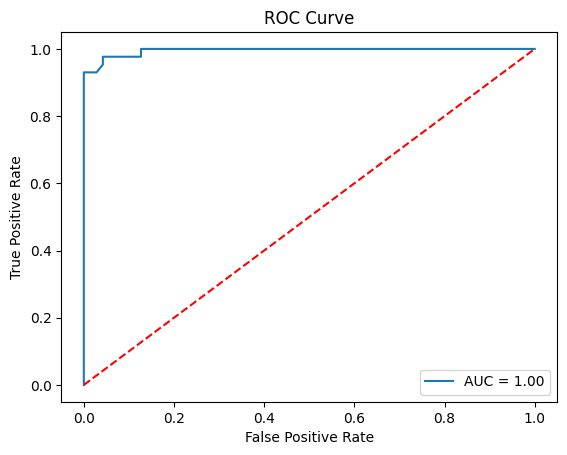

In [14]:

# Evaluation Metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
auc_score = roc_auc_score(y_test, probabilities)
# Printing evaluation metrics
print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall:{recall}\nF1 Score: {f1}\nAUC: {auc_score}")
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, probabilities)
plt.figure()
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
# Define column names based on the dataset description (including mean, SE, and worst for each feature)
feature_names = ['radius', 'texture', 'perimeter', 'area','smoothness', 'compactness', 'concavity','concave_points', 'symmetry', 'fractal_dimension']
# Creating column names for mean, se, and worst measurements
column_names = ['id', 'diagnosis'] + [f"{f}_{m}" for f in
feature_names for m in ['mean', 'se', 'worst']]
# Load the dataset
data = pd.read_csv('wdbc.data', header=None, names=column_names)
# Convert the diagnosis column to binary labels (Malignant: 1, Benign: 0)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})


# Drop the 'id' column as it is not required for the analysis
data.drop('id', axis=1, inplace=True)
# Split the data into features and target variable
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)
# Create and train the RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)
# Predictions
predictions = classifier.predict(X_test)
probabilities = classifier.predict_proba(X_test)[:, 1]


# Evaluation Metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
auc_score = roc_auc_score(y_test, probabilities)
# Printing evaluation metrics
print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall:{recall}\nF1 Score: {f1}\nAUC: {auc_score}")
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, probabilities)
plt.figure()
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()